# PA 2: Classification - Decision Tree

# Student Details ( 1 Point)
**Student Name and ID:    Nithya Balasundar (1001763661)**	<	Only this student will submit the assignment

**Student Name and ID: 	Vysali Pughazhendi(1001750473)**
                        

Notes: When submitting, fill your name and ID in this cell. [1 point] Do not to forget to cite any external sources used by you.


# Programming Assignment Submission Instructions (2  Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point] 

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName' [1 point]

Do not upload the database file [-50 points]


# Programming Assignment Details (7 Points)
For this assignment use Jupyter notebook, Panda, and scikit.

1)	Load adult dataset from train_cl.csv [1 points]

2)	Create a dataframe and print the first and last five records of your dataset. [2 points]

3)	Print the class labels. [2 points]

4)	Split your dataset 70% for training, and 30% for testing the classifier. [2 points]


# DecisionTree (10 Points)

1)	Use gini and entropy to measure the quality of a split. [2 points]

2)	Use comments to explain your code and variable names. [1 point]

3)	Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support). [2 points]

4)	Print the decision tree visualization. [5 points]


# Naive Bayes (10 Points)

1)	Use Naive bayes classifier (Gaussian) to predict the test data[5 point]

2)	Use comments to explain your code and variable names[1 point]

3)	Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support). [4 points]


# Report (20 Points)

1)	Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own. [4 points]

2)	Describe the datasets [3 points] and if you have done any pre-processing , and your code. [2 points]

4)	Visualization of the decision tree for gini and entropy.[5 points]

5)	Interpret your results, and do not forget to compare gini and entropy [6 points] Do not to forget to cite your sources!



# Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - -

# REFERENCES:
    
#1 https://www.kdnuggets.com/2020/05/dataset-splitting-best-practices-python.html
#2 https://scikit-learn.org/stable/modules/tree.html
#3 https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [1582]:
#Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Libraries for Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import Image  

from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import collections




In [1583]:
# 1)Load the adult dataset from train_cl.csv using pandas.
#Creating a dataframe using read csv function
df_train_cl =pd.read_csv('train_cl.csv',sep=',',encoding='utf8')

In [1584]:
#2a) Displaying first five records of the dataset

print("The first five records of the dataset\n");
df_train_cl.head()

The first five records of the dataset



,Unnamed: 0,Survived,Sex,Age,Fare,famiy,Embarked_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,isAlone
0,0,0,0,22.0,7.2500,2,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,1,1,38.0,71.2833,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2,1,1,26.0,7.9250,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,3,1,1,35.0,53.1000,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,4,0,0,35.0,8.0500,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [1585]:
#2b)Displaying last five records of the dataset

print("The last five records of the dataset:\n");
df_train_cl.tail()

The last five records of the dataset:



,Unnamed: 0,Survived,Sex,Age,Fare,famiy,Embarked_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,isAlone
886,886,0,0,27.000000,13.00,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
887,887,1,1,19.000000,30.00,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
888,888,0,1,29.699118,23.45,4,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
889,889,1,0,26.000000,30.00,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
890,890,0,0,32.000000,7.75,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [1586]:
# Printing the datatype and columns of the train_cl dataset
dtype=df_train_cl.dtypes
dcolumn=df_train_cl.columns
print(dtype)
print('-'*60)
print(dcolumn)

Unnamed: 0      int64
Survived        int64
Sex             int64
Age           float64
Fare          float64
famiy           int64
Embarked_0      int64
AgeGroup_1      int64
AgeGroup_2      int64
AgeGroup_3      int64
AgeGroup_4      int64
SibSp_0         int64
SibSp_1         int64
SibSp_2         int64
SibSp_3         int64
SibSp_4         int64
SibSp_5         int64
SibSp_8         int64
Pclass_1        int64
Pclass_2        int64
Pclass_3        int64
Parch_0         int64
Parch_1         int64
Parch_2         int64
Parch_3         int64
Parch_4         int64
Parch_5         int64
Parch_6         int64
isAlone         int64
dtype: object
------------------------------------------------------------
Index(['Unnamed: 0', 'Survived', 'Sex', 'Age', 'Fare', 'famiy', 'Embarked_0',
       'AgeGroup_1', 'AgeGroup_2', 'AgeGroup_3', 'AgeGroup_4', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Parch_0', 'Parch_1

In [1587]:
#3)Printing the class labels of the dataset
print(df_train_cl['Survived'])
#Finding the unique class labels for reference
print('-'*60)
print('Unique values in class label are:')
pd.unique(df_train_cl['Survived'])


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
------------------------------------------------------------
Unique values in class label are:


array([0, 1], dtype=int64)

In [1588]:
# Divide columns of the dataset into features and labels(target values)
X=df_train_cl.drop(['Survived'], axis=1) #features
y=df_train_cl['Survived'] #labels(target values)


#4)Splitting the dataset 70% for training, and 30% for testing the classifier using function train_test_split().

#X_Train is to store the train data values
#y_Train is to store train target values.
#X_Test is to store the test data values
#y_Test is to store test target values.
#The dataset is split into testing and training data of size 30% and 70% respectively.
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.3, random_state =51)

#printing the number of rows and columns in the training and test data
print(X_Train.shape)
print(y_Train.shape)
print(X_Test.shape)
print(y_Test.shape)




(623, 28)
(623,)
(268, 28)
(268,)




# **DECISION TREE**



# Decision Tree using Gini as a Measure

In [1589]:
#Decision Tree

#1a)Using Gini to measure the quality of the split 
gini_measure = DecisionTreeClassifier(criterion="gini", random_state=13,max_depth=None, min_samples_leaf=1)
# Train the data
gini_measure.fit(X_Train, y_Train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [1590]:
#ypredict holds the predicted target values of the tested data 
yPredict = gini_measure.predict(X_Test)
yPredict



array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0], dtype=int64)

In [1591]:

from sklearn.metrics import confusion_matrix
print('The confusion matrix for the given dataset using gini as a measure is: \n')
cm=confusion_matrix(y_Test, yPredict)
pd.DataFrame(
    confusion_matrix(y_Test, yPredict),
    columns=['Predicted Not Survived', 'Predicted Survived'],
    index=['Actual Not Survived', 'Actual Survived']
)

The confusion matrix for the given dataset using gini as a measure is: 



,Predicted Not Survived,Predicted Survived
Actual Not Survived,142,27
Actual Survived,29,70


In [1592]:
#calculating the classification report using gini as a measure
print('The classification report for the given dataset using gini as a measure is: \n')
print(classification_report(y_Test, yPredict))

The classification report for the given dataset using gini as a measure is: 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       169
           1       0.72      0.71      0.71        99

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



# DECISION TREE VISUALISATION USING GINI AS A MEASURE 

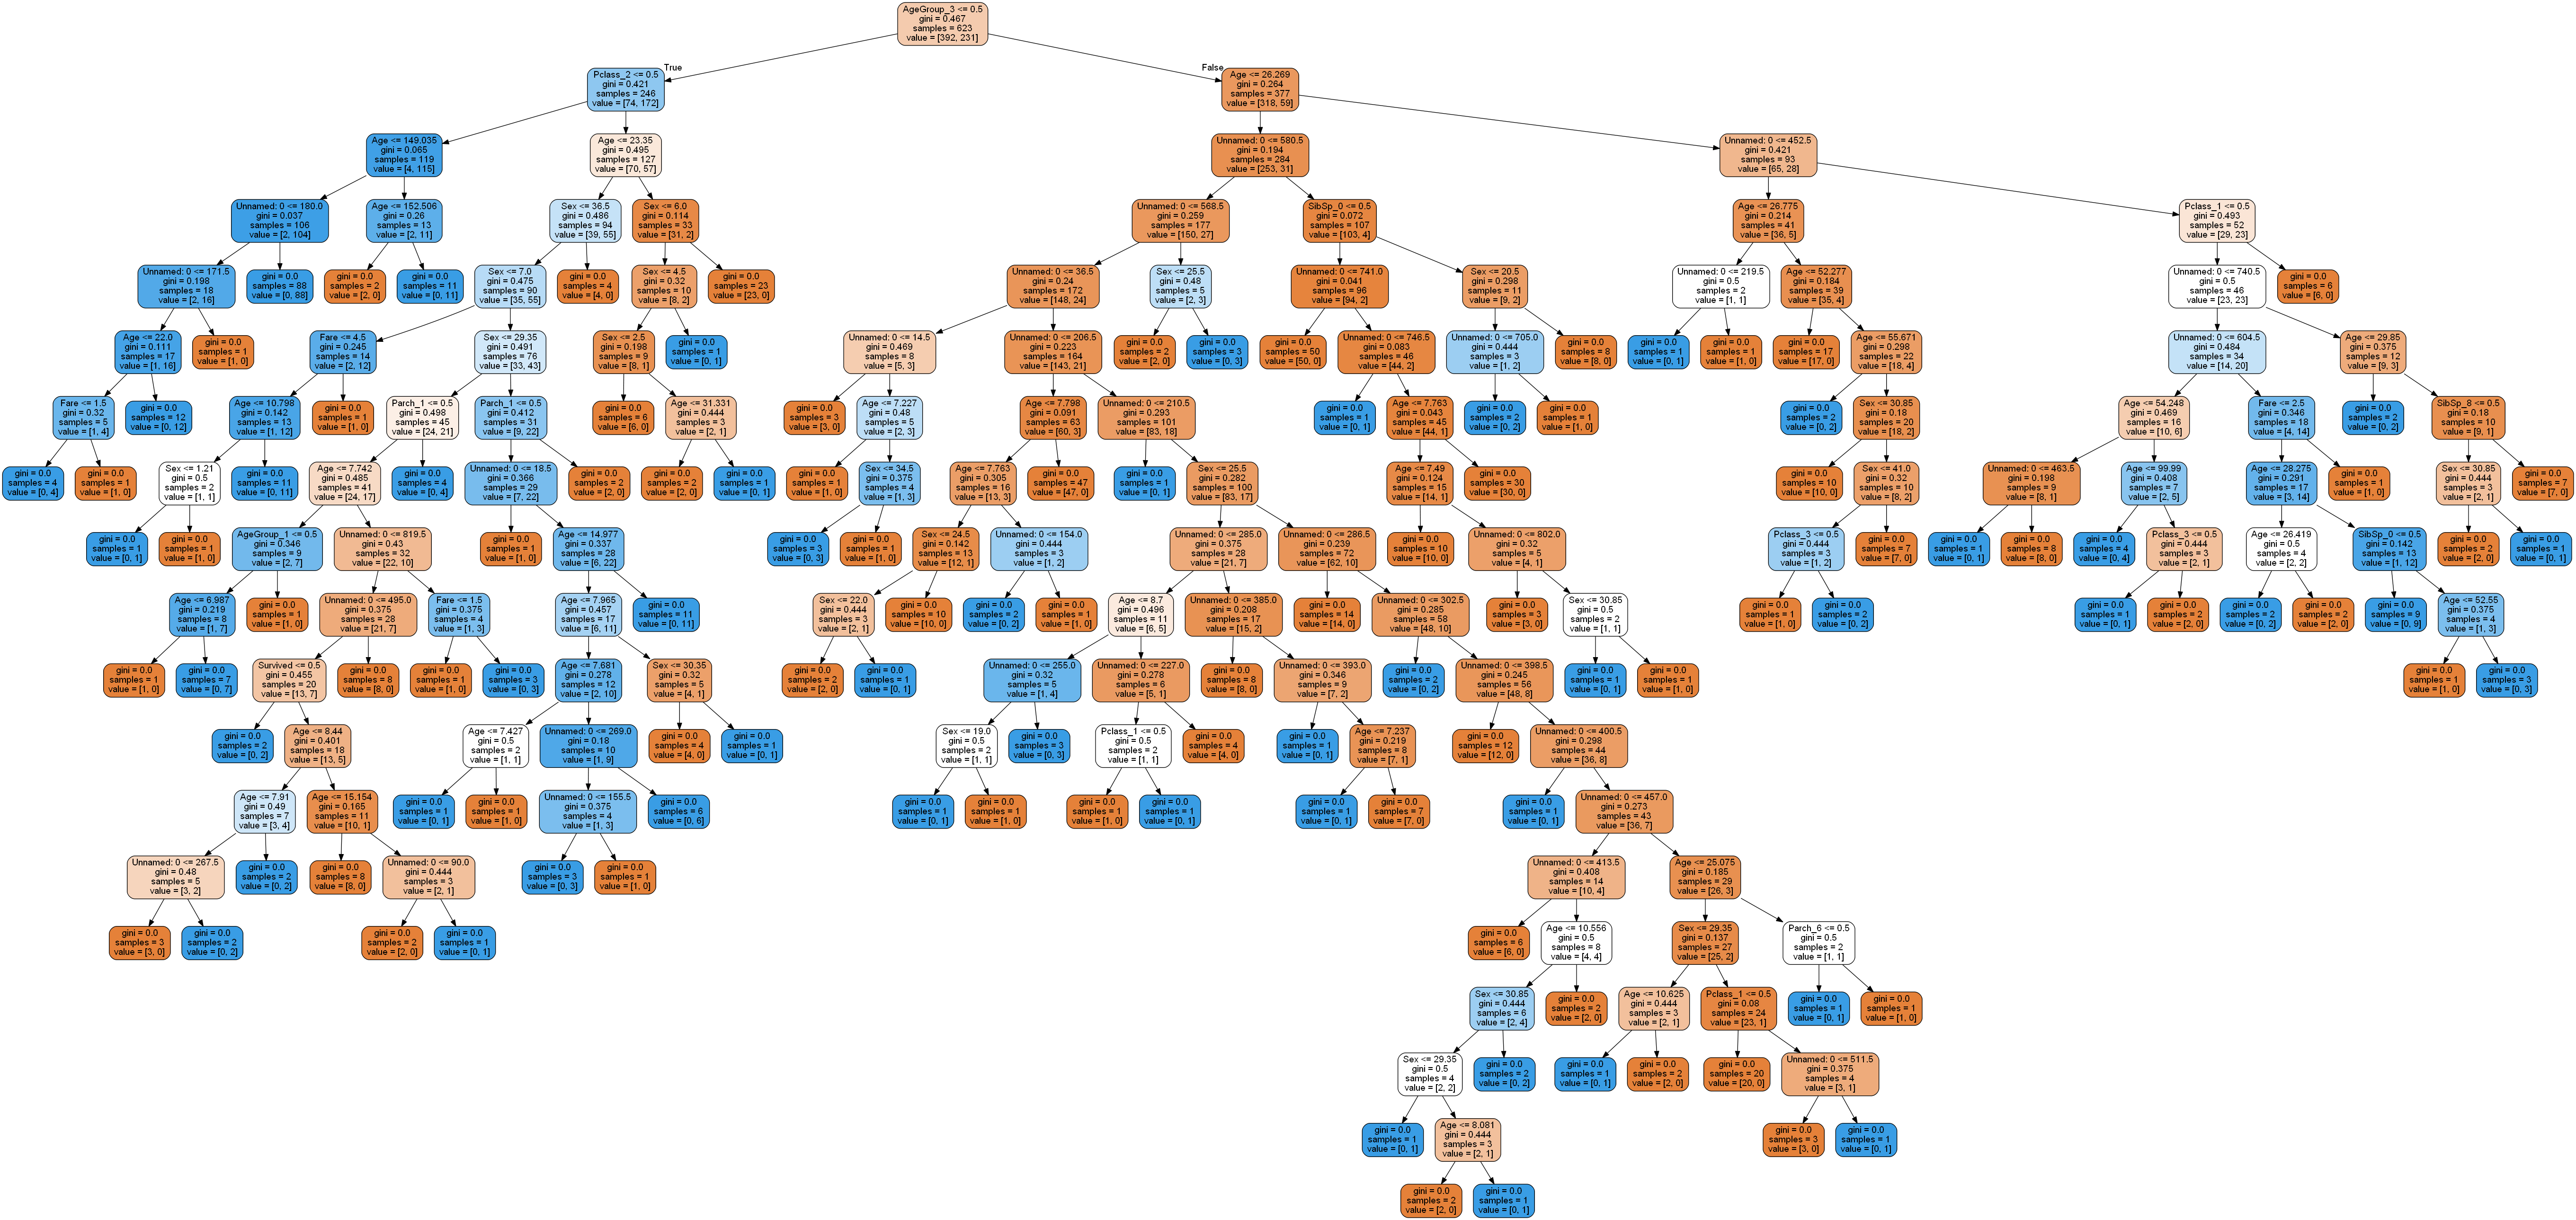

In [13]:
#Create a list to store all the feature names
features = list(df_train_cl.columns[1:28])
# Data Stream is initialised using dot_data
dot_data = StringIO()
# converting decision tree using gini classifier into dot file 
export_graphviz(gini_measure, out_file=dot_data,feature_names=list(df_train_cl.columns[0:28]),filled=True,rounded=True)
# pydot is used to convert this into an image
graph = pydot.graph_from_dot_data(dot_data.getvalue())         
Image(graph[0].create_png())

# Decision Tree using Entropy as a measure

In [1593]:
#1b)Using Entropy to measure the quality of the split 
classifier = tree.DecisionTreeClassifier()
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train the data
classifier = classifier.fit(X_Train,y_Train)

In [1594]:
#y_predict holds the predicted target values of the tested data 
y_Predict = classifier.predict(X_Test)
y_Predict

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [1595]:
from sklearn.metrics import confusion_matrix
print('The confusion matrix for the given dataset using entropy as a measure is: \n')
cm=confusion_matrix(y_Test, y_Predict)
pd.DataFrame(
    confusion_matrix(y_Test, y_Predict),
    columns=['Predicted Not Survived', 'Predicted Survived'],
    index=['Actual Not Survived', 'Actual Survived']
)



The confusion matrix for the given dataset using entropy as a measure is: 



,Predicted Not Survived,Predicted Survived
Actual Not Survived,150,19
Actual Survived,29,70


In [1596]:
#calculating the classification report
print('The classification report for the given dataset using entropy as a measure is: \n')
print(classification_report(y_Test, y_Predict))

The classification report for the given dataset using entropy as a measure is: 

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       169
           1       0.79      0.71      0.74        99

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



# Decison Tree Visualization using entropy as a measure 

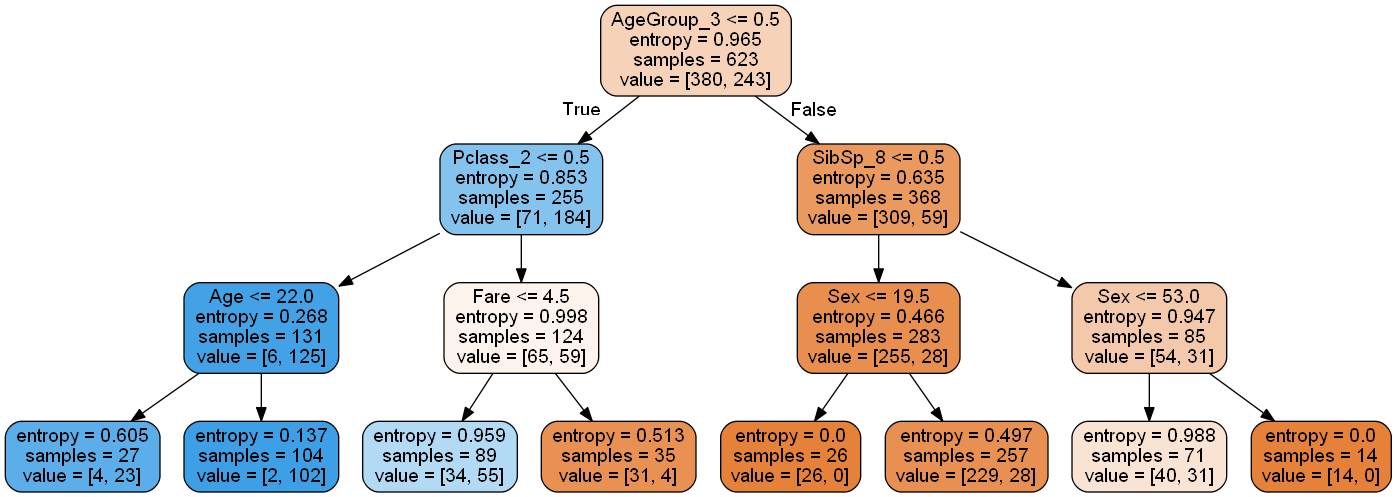

In [1598]:

#Create a list to store all the feature names
feature = list(df_train_cl.columns[0:28])
#Data Stream is initialised using dot_data
dot_data = StringIO()
#converting decision tree using gini classifier into dot file
export_graphviz(classifier, out_file=dot_data,feature_names=feature,filled=True,rounded=True)
#pydot is used to convert this into an image
graph = pydot.graph_from_dot_data(dot_data.getvalue())         
Image(graph[0].create_png())




# NAIVE BAYES CLASSIFIER TO PREDICT THE TEST DATA

In [1553]:
# Navie Bayes Classifier

# importing necessary tools from sklearn, also importing matplotlib and seaborn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [1554]:
#X_Train is to store the train data values
#y_Train is to store train target values.
#X_Test is to store the test data values
#y_Test is to store test target values.
#The dataset is split into testing and training data of size 30% and 70% respectively.

x = df_train_cl.drop('Survived', axis=1)
y = df_train_cl['Survived']
X_Train, X_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.3)

#(1) Use Naive bayes classifier (Gaussian) to predict the test data
model = GaussianNB()
model.fit(X_Train, y_Train)



GaussianNB(priors=None, var_smoothing=1e-09)

In [1555]:
#y_pred holds the predicted target values of the tested data
y_Pred = model.predict(X_Test)
y_Pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [1556]:
#(3) Calculate and print the confusion matrix, and the classification Report
#calculating the confusion matrix
from sklearn.metrics import confusion_matrix
print('The confusion matrix for the given dataset using naive bayes is: \n')
cm=confusion_matrix(y_Test, y_Pred)
pd.DataFrame(
    confusion_matrix(y_Test, y_Pred),columns=['Predicted Not Survived', 'Predicted Survived'],
    index=['Actual Not Survived', 'Actual Survived']
)




The confusion matrix for the given dataset using naive bayes is: 



,Predicted Not Survived,Predicted Survived
Actual Not Survived,90,70
Actual Survived,13,95


In [1557]:
#calculating the classification report
print('The classification report for the given dataset using naive bayes is: \n')
print(classification_report(y_Test, y_Pred))

The classification report for the given dataset using naive bayes is: 

              precision    recall  f1-score   support

           0       0.87      0.56      0.68       160
           1       0.58      0.88      0.70       108

    accuracy                           0.69       268
   macro avg       0.72      0.72      0.69       268
weighted avg       0.75      0.69      0.69       268

